In [89]:
import datetime as dt
import mplfinance as mpf
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.size'      : 14,
    'axes.grid'      : True,
    'grid.linestyle' : '--',
    'figure.figsize' : [12, 6]
})
import yfinance as yf

[*********************100%%**********************]  1 of 1 completed


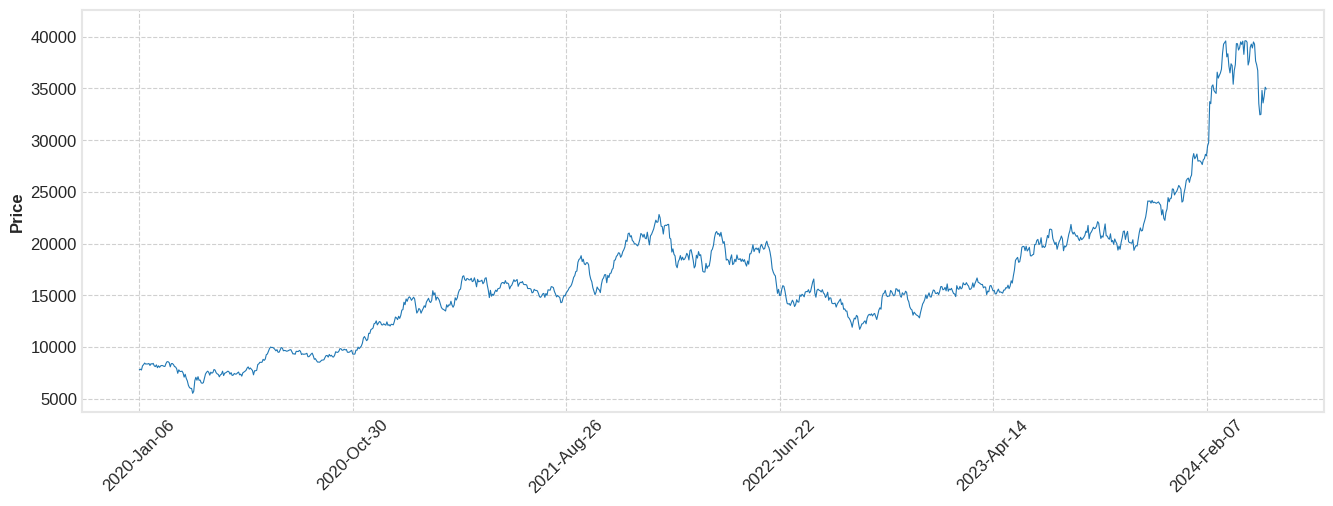

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-06,7868.333496,7895.000000,7776.666504,7785.000000,7040.187012,3440400
2020-01-07,7830.000000,7861.666504,7755.000000,7838.333496,7088.418457,2783700
2020-01-08,7691.666504,7823.333496,7625.000000,7763.333496,7020.593750,4708200
2020-01-09,7918.333496,8170.000000,7918.333496,8161.666504,7380.817383,4565400
2020-01-10,8231.666992,8366.666992,8185.000000,8280.000000,7487.830078,4650600
...,...,...,...,...,...,...
2024-04-24,33590.000000,34810.000000,33340.000000,34810.000000,34810.000000,5081400
2024-04-25,33530.000000,34360.000000,33400.000000,33600.000000,33600.000000,3712900
2024-04-26,34250.000000,34780.000000,33730.000000,34230.000000,34230.000000,4399400


In [303]:
start = dt.date(2020, 1, 1)
end = dt.date(2024, 5, 2)
end2 = dt.date(2024, 5, 3)

#ticker = '7735.T' # スクリーン
ticker = '8035.T' # 東京エレクトロン
df0 = yf.download(ticker, start, end)
mpf.plot(df0, type='line', style='binance', figratio=(12, 4))
df0

In [304]:
df1 = pd.DataFrame(df0['Close'])
df1.columns=['Price']
df1

,Price
Date,
2020-01-06,7785.000000
2020-01-07,7838.333496
2020-01-08,7763.333496
2020-01-09,8161.666504
2020-01-10,8280.000000
...,...
2024-04-24,34810.000000
2024-04-25,33600.000000
2024-04-26,34230.000000


[*********************100%%**********************]  1 of 1 completed


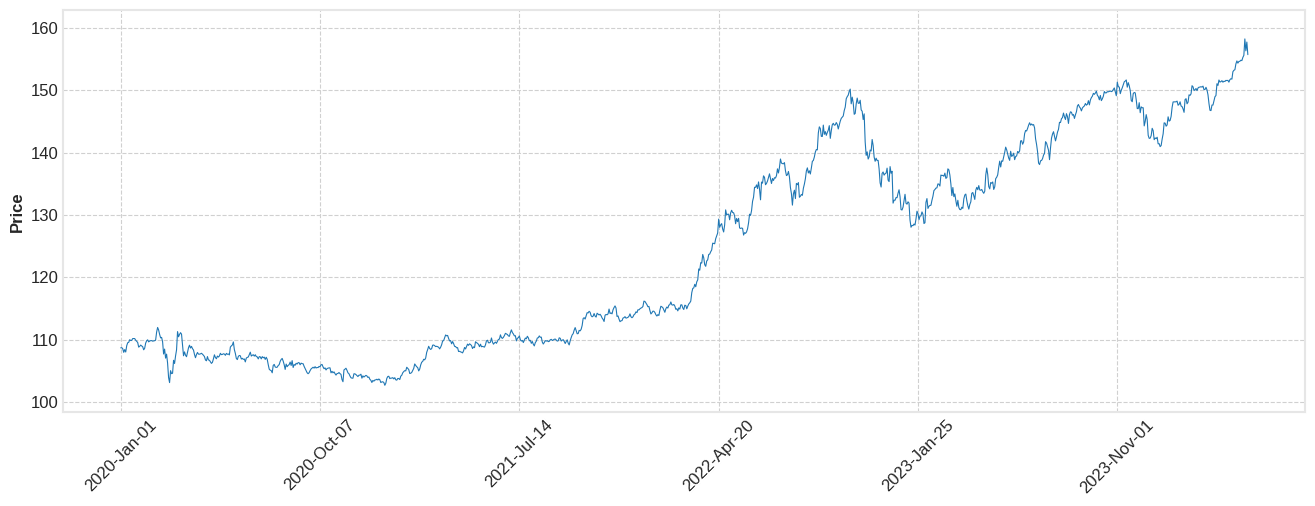

,JPY
Date,
2020-01-01,108.681000
2020-01-02,108.712997
2020-01-03,108.542999
2020-01-06,107.963997
2020-01-07,108.405998
...,...
2024-04-26,155.597000
2024-04-29,158.223999
2024-04-30,156.313995


In [305]:
fx = 'USDJPY=X'
df2 = yf.download(fx, start, end2)
mpf.plot(df2, type='line', style='binance', figratio=(12, 4))
df3 = pd.DataFrame(df2['Close'])
df3.columns = ['JPY']
df3

In [306]:
#time_df = pd.DataFrame(pd.date_range(df.index.min(), dt.datetime.strptime("2024-05-02", "%Y-%m-%d"), freq='d'), columns=["Date"])
time_df = pd.DataFrame(pd.date_range(start, end, freq='d'), columns=["Date"]).set_index('Date')
df = pd.concat([time_df, df1, df3], axis=1)
df4 = df['JPY']
df4.interpolate(inplace=True)
df['JPY'] = df4
df

,Price,JPY
Date,,
2020-01-01,NaN,108.681000
2020-01-02,NaN,108.712997
2020-01-03,NaN,108.542999
2020-01-04,NaN,108.349998
2020-01-05,NaN,108.156998
...,...,...
2024-04-28,NaN,157.348333
2024-04-29,NaN,158.223999
2024-04-30,35120.0,156.313995


In [307]:
pd.concat([df, df3], axis=1)

,Price,JPY,JPY
Date,,,
2020-01-01,NaN,108.681000,108.681000
2020-01-02,NaN,108.712997,108.712997
2020-01-03,NaN,108.542999,108.542999
2020-01-04,NaN,108.349998,NaN
2020-01-05,NaN,108.156998,NaN
...,...,...,...
2024-04-28,NaN,157.348333,NaN
2024-04-29,NaN,158.223999,158.223999
2024-04-30,35120.0,156.313995,156.313995


In [357]:
model = sm.tsa.UnobservedComponents(
    df[['Price']],
    #level='local level',
    level='local linear trend',
    #level='local linear deterministic trend',
    #level='random walk with drift',
    seasonal=7,
)

results = model.fit(
    method='bfgs', 
    maxiter=5000, 
    start_params=model.fit(method='nm', maxiter=5000).params,
)
#results = model.fit()

Optimization terminated successfully.
         Current function value: 5.039818
         Iterations: 462
         Function evaluations: 794
Optimization terminated successfully.
         Current function value: 5.039818
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


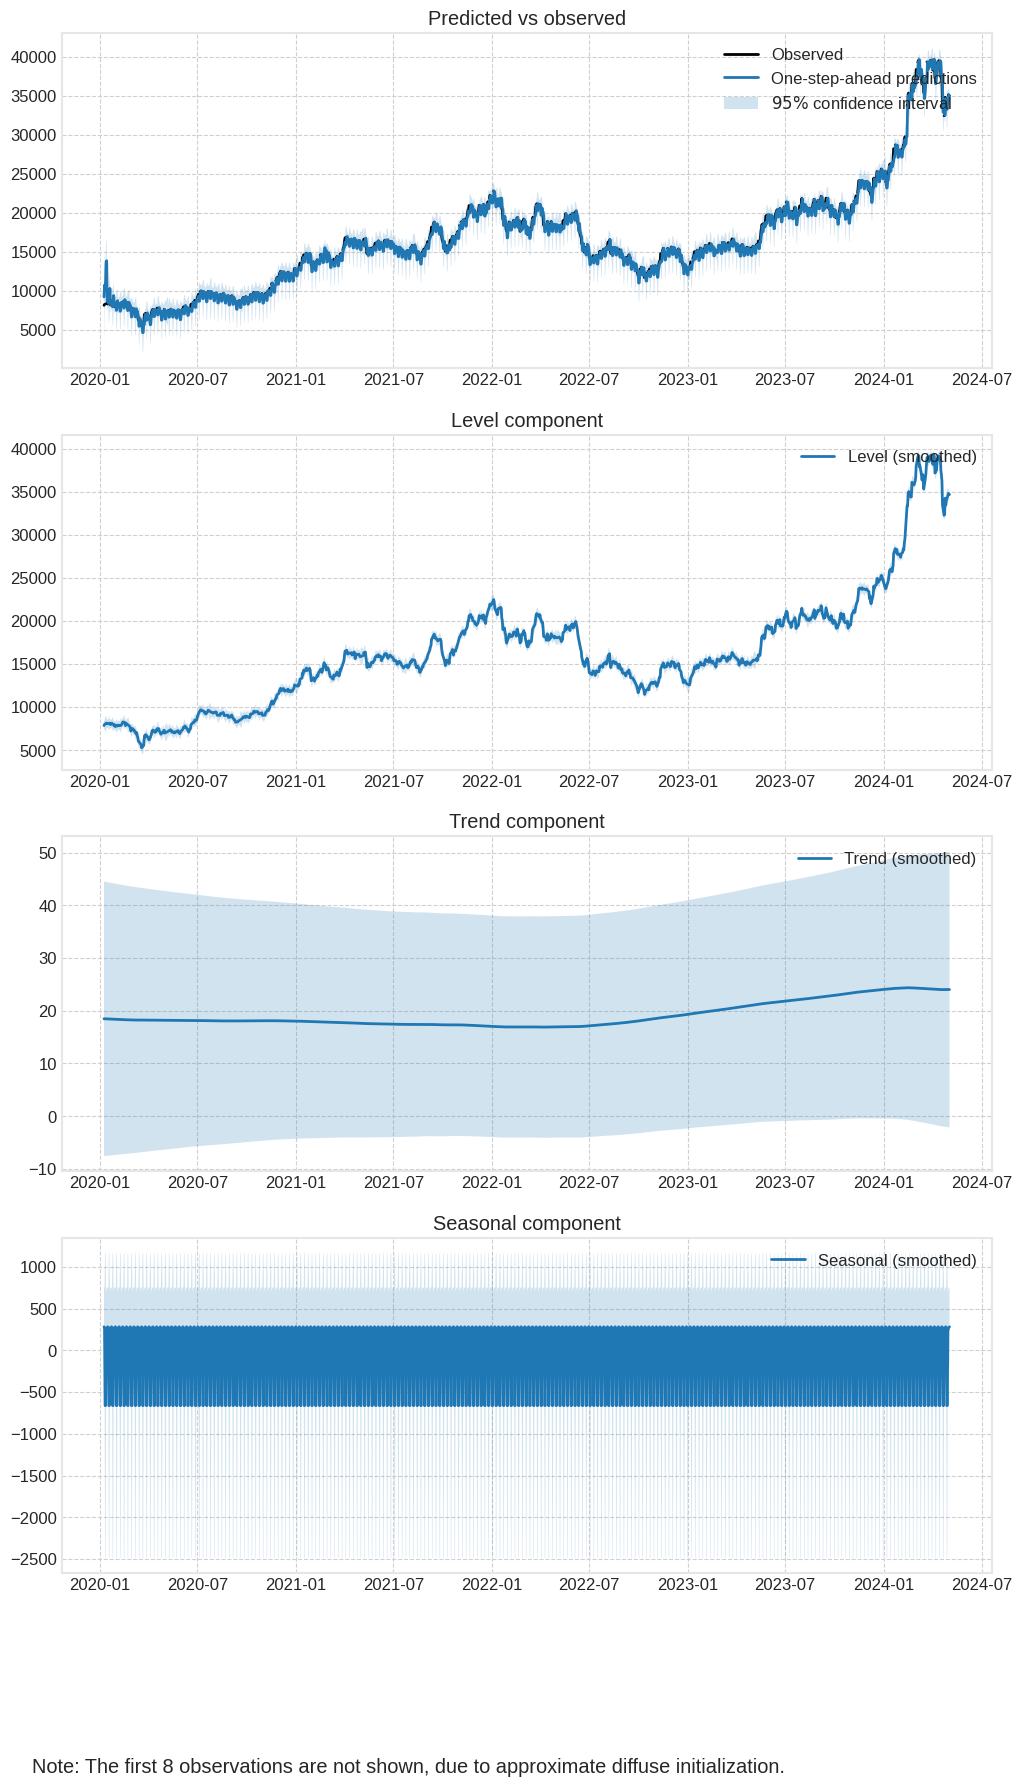

In [358]:
out = results.plot_components(figsize=(12, 20))

In [359]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Unobserved Components Results                            
====================================================================================
Dep. Variable:                        Price   No. Observations:                 1584
Model:                   local linear trend   Log Likelihood               -7983.072
                   + stochastic seasonal(7)   AIC                          15974.144
Date:                      Mon, 06 May 2024   BIC                          15995.594
Time:                              18:44:37   HQIC                         15982.115
Sample:                          01-01-2020                                         
                               - 05-02-2024                                         
Covariance Type:                        opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  1.413e+04   4326.917      3.265      0.001    5645.242    2.26e+04
sigma2.level      1.406e+05   6951.763     20.226      0.000    1.27e+05    1.54e+05
sigma2.trend         0.2054      0.639      0.321      0.748      -1.047       1.458
sigma2.seasonal   3.744e-12      4.991    7.5e-13      1.000      -9.782       9.782
===================================================================================
Ljung-Box (L1) (Q):                   3.88   Jarque-Bera (JB):             11460.37
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               4.14   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [352]:
# Prediction
prediction = results.predict('2024-04-01', '2024-05-15')

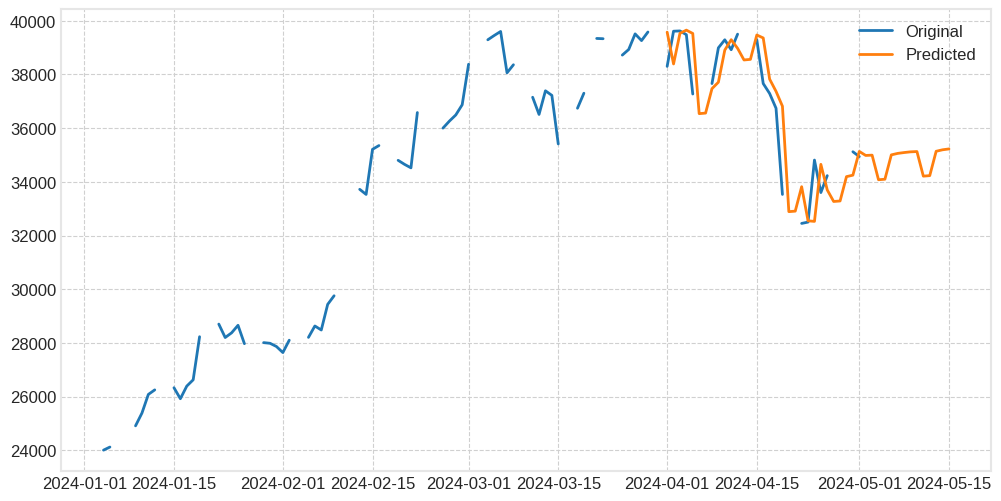

In [353]:
plt.rcParams.update({
    'font.size'      : 12,
    'axes.grid'      : True,
    'grid.linestyle' : '--',
    'figure.figsize' : [12, 6]
})

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(df['2024-01-01':'2024-05-02']['Price'], label='Original', color="C0")
ax.plot(prediction, label='Predicted', color="C1")

ax.legend()

plt.show()